

# Removing muscle ICA components

Gross movements produce widespread high-frequency activity across all channels
that is usually not recoverable and so the epoch must be rejected as shown in
`ex-muscle-artifacts`. More ubiquitously than gross movements, muscle
artifact is produced during postural maintenance. This is more appropriately
removed by ICA otherwise there wouldn't be any epochs left! Note that muscle
artifacts of this kind are much more pronounced in EEG than they are in MEG.


In [3]:
# Authors: Alex Rockhill <aprockhill@mailbox.org>
#
# License: BSD-3-Clause
# Copyright the MNE-Python contributors.

In [52]:
import mne
import os

In [8]:
print("Channels loaded by MNE:")
print(raw.info['ch_names'])


Channels loaded by MNE:
['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2', 'FC6', 'CP2', 'CP6', 'F10']


In [81]:
# Define the path to your .edf file
edf_file_path = 'PN00-1.edf'  # Replace with the actual file name if it's in the same directory

# Load the EDF file
raw = mne.io.read_raw_edf(edf_file_path, preload=True)

# Crop the raw data to take only 30 seconds for faster processing
#raw.crop(tmin=20, tmax=50)   #Take 30 seconds for speed
raw.crop(tmin=1143, tmax=1213) #epilepsy episode
#raw.crop(tmin=1083, tmax=1273) #epilepsy episode + 2 min buffer before and after

#raw.crop(tmin=1023, tmax=1333) #epilepsy episode + 2 min buffer before and after
#raw.crop(tmin=1023, tmax=1213) #epilepsy episode + 2 min buffer before 


# Pick only EEG channels, excluding any marked as bad
raw.pick(picks="eeg", exclude="bads")

# Define a mapping from your channel names to standard 10-20 system names
# This is to ensure consistency and compatibility with standard EEG analysis tools
rename_mapping = {
    'EEG Fp1': 'Fp1',
    'EEG Fp2': 'Fp2',
    'EEG F3': 'F3',
    'EEG F4': 'F4',
    'EEG F7': 'F7',
    'EEG F8': 'F8',
    'EEG T3': 'T3',
    'EEG T4': 'T4',
    'EEG C3': 'C3',
    'EEG C4': 'C4',
    'EEG T5': 'T5',
    'EEG T6': 'T6',
    'EEG P3': 'P3',
    'EEG P4': 'P4',
    'EEG O1': 'O1',
    'EEG O2': 'O2',
    'EEG Fz': 'Fz',
    'EEG Cz': 'Cz',
    'EEG Pz': 'Pz',
    'EEG Fc1': 'FC1',
    'EEG Fc2': 'FC2',
    'EEG Fc5': 'FC5',
    'EEG Fc6': 'FC6',
    'EEG Cp1': 'CP1',
    'EEG Cp2': 'CP2',
    'EEG Cp5': 'CP5',
    'EEG Cp6': 'CP6',
    'EEG F9': 'F9',
    'EEG F10': 'F10',
    'EKG EKG': 'ECG'
}

# Rename the channels in the raw object according to the mapping
raw.rename_channels(rename_mapping)

# Drop non-brain channels which are not used in EEG brain signal analysis
# - 'ECG' is for cardiac activity monitoring
# - 'SPO2' is for oxygen saturation level monitoring
# - 'HR' is for heart rate monitoring
# - '1', '2', 'MK' are auxiliary channels not related to EEG brain signals
raw.drop_channels(['ECG', 'SPO2', 'HR', '1', '2', 'MK'])


# Define a standard montage (10-20 system)
# This ensures that electrode locations are accurately represented, which is important for spatial analyses
montage = mne.channels.make_standard_montage('standard_1020')

# Apply the montage to the raw data
raw.set_montage(montage)

# ICA works best with a highpass filter applied
raw.filter(l_freq=1.0, h_freq=None)

# Load the raw data into memory
raw.load_data()


Extracting EDF parameters from /Users/diegotaquiri/Desktop/proyectos/upch/cursos-2024-1/ISB/07-14-24-eeg-trata-practica/PN00-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1343999  =      0.000 ...  2624.998 secs...


/var/folders/zp/l_dxbf9s3gs1nn6pxs7lmdww0000gp/T/ipykernel_1176/4241331334.py:5: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file_path, preload=True)
/var/folders/zp/l_dxbf9s3gs1nn6pxs7lmdww0000gp/T/ipykernel_1176/4241331334.py:5: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file_path, preload=True)
/var/folders/zp/l_dxbf9s3gs1nn6pxs7lmdww0000gp/T/ipykernel_1176/4241331334.py:5: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Measurement date,"January 01, 2016 19:39:33 GMT"
Experimenter,Unknown
Participant,
Digitized points,32 points
Good channels,29 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,1.00 Hz
Lowpass,256.00 Hz


In [85]:
# Plot the raw EEG signals
raw.plot(duration=310, n_channels=30, scalings='auto', title='Raw EEG Signals', show=True)

Using pyopengl with version 3.1.6


Channels marked as bad:
none


Run ICA



In [82]:
ica = mne.preprocessing.ICA(
    n_components=10, method="picard", max_iter="auto", random_state=97
)
ica.fit(raw)

Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 1.2s.


Method,picard
Fit parameters,max_iter=500
Fit,50 iterations on raw data (35841 samples)
ICA components,10
Available PCA components,29
Channel types,eeg
ICA components marked for exclusion,—


Remove components with postural muscle artifact using ICA



In [86]:
ica.plot_sources(raw)

Creating RawArray with float64 data, n_channels=10, n_times=35841
    Range : 585216 ... 621056 =   1143.000 ...  1213.000 secs
Ready.


Using pyopengl with version 3.1.6


By inspection, let's select out the muscle-artifact components based on
:footcite:`DharmapraniEtAl2016` manually.

The criteria are:

- Positive slope of log-log power spectrum between 7 and 75 Hz
  (here just flat because it's not in log-log)
- Peripheral focus or dipole/multi-pole foci (the blue and red
  blobs in the topomap are far from the vertex where the most
  muscle is)
- Single focal point (low spatial smoothness; there is just one focus
  of the topomap compared to components like the first ones that are
  more likely neural which spread across the topomap)

The other attribute worth noting is that the time course in
:func:`mne.preprocessing.ICA.plot_sources` looks like EMG; you can
see spikes when each motor unit fires so that the time course looks fuzzy
and sometimes has large spikes that are often at regular intervals.

ICA component 13 is a textbook example of what muscle artifact looks like.
The focus of the topomap for this component is right on the temporalis
muscle near the ears. There is also a minimum in the power spectrum at around
10 Hz, then a maximum at around 25 Hz, generally resulting in a positive
slope in log-log units; this is a very typical pattern for muscle artifact.



    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated


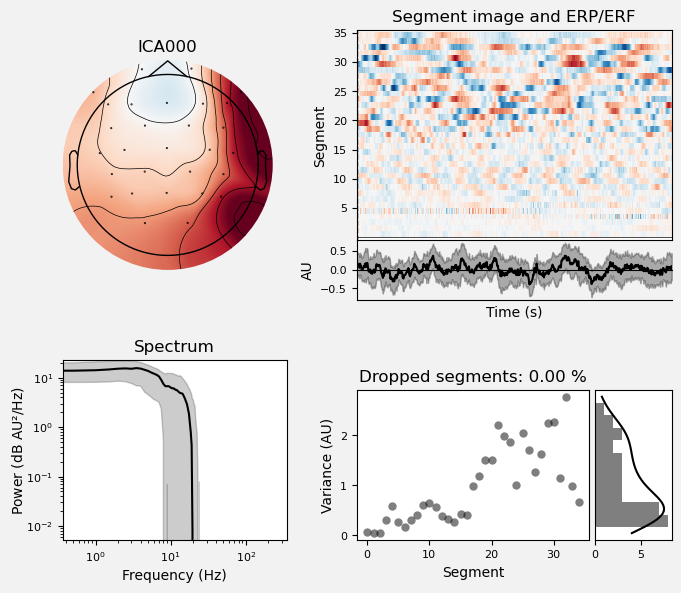

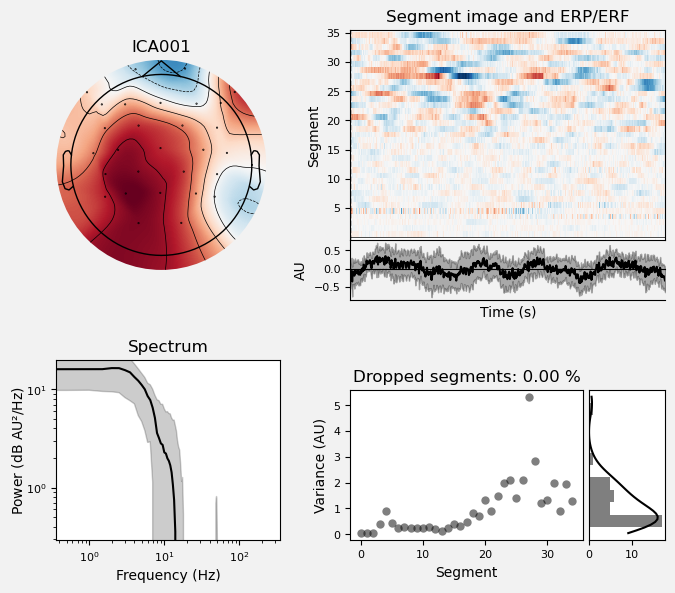

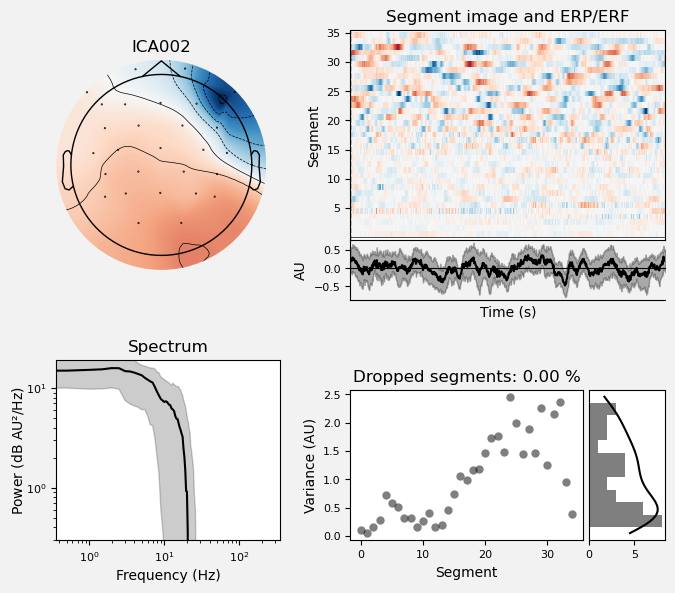

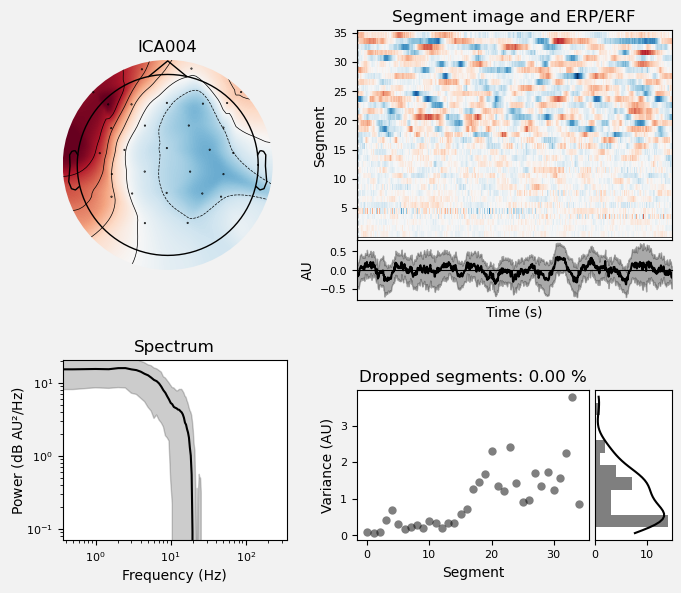

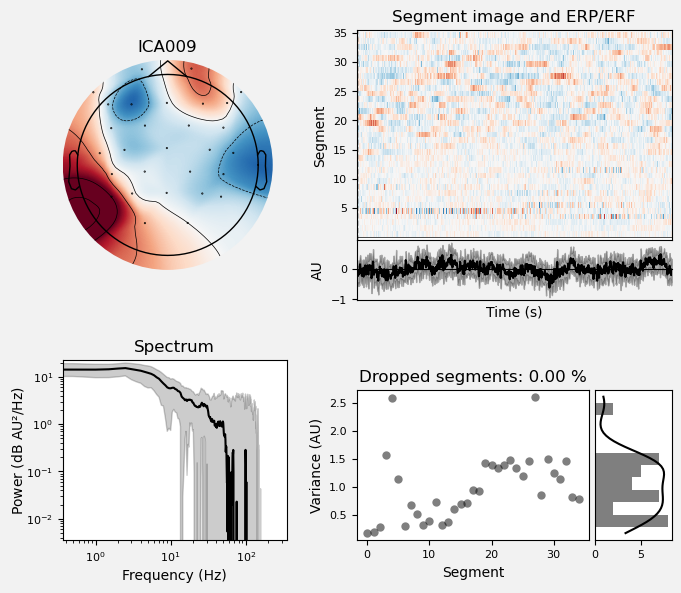

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [95]:
idx = [0, 1, 2, 4, 9]
ica.plot_properties(raw, picks=idx, log_scale=True)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated


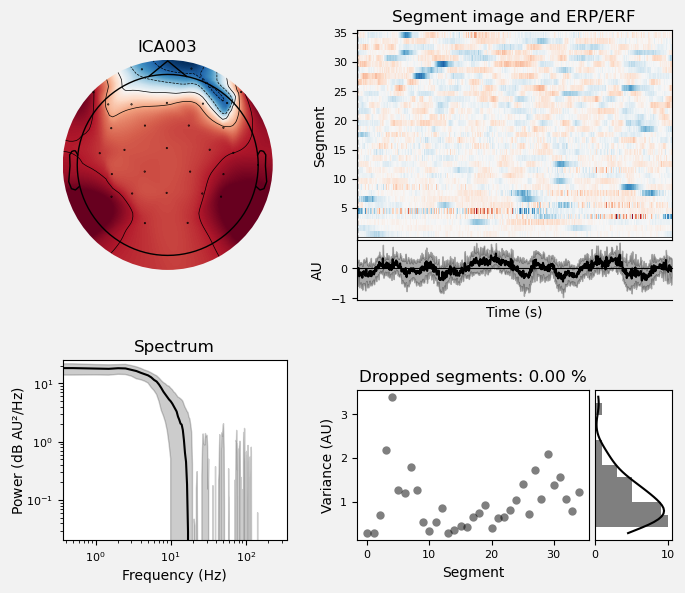

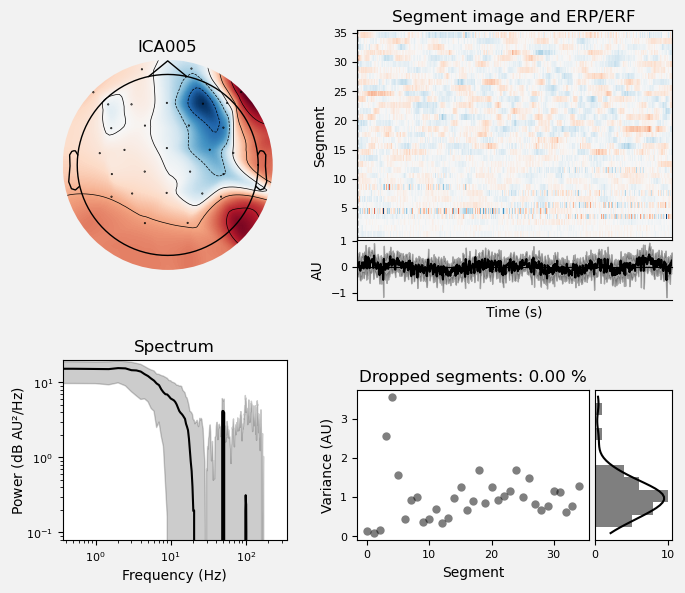

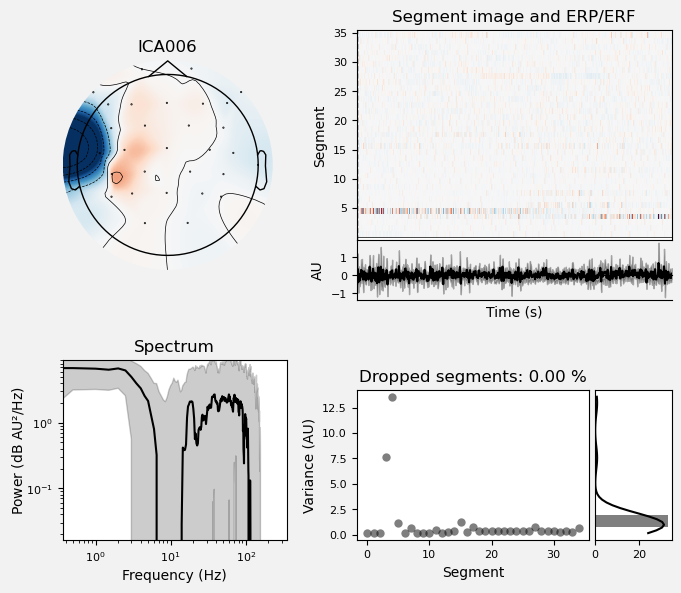

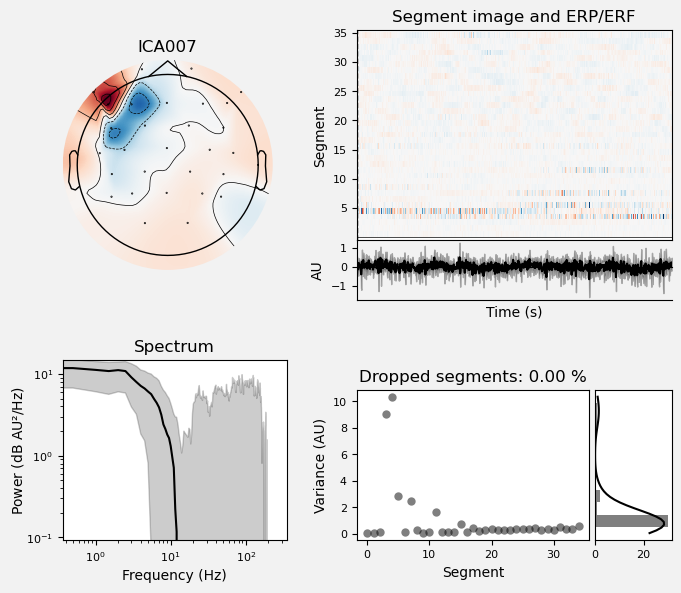

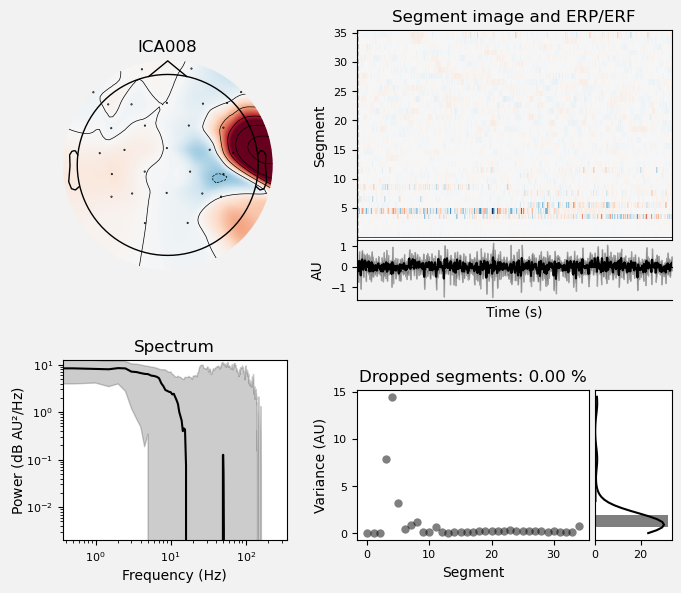

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [96]:
artifacts_idx = [3,5,6,7,8]
ica.plot_properties(raw, picks=artifacts_idx, log_scale=True)

Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 0 ICA components
    Projecting back using 29 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 5 ICA components
    Projecting back using 29 PCA components


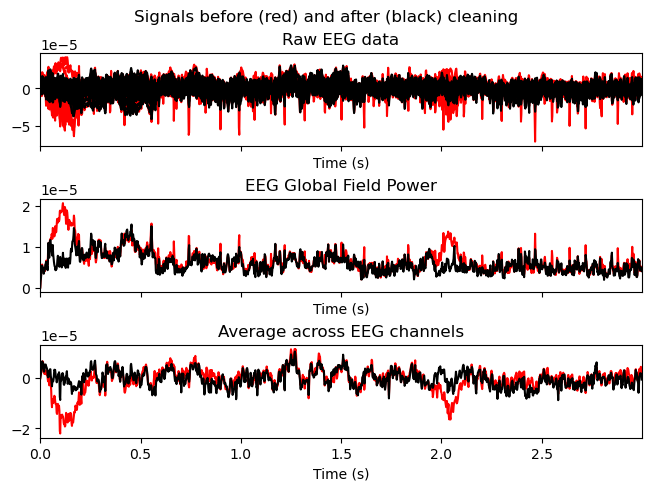

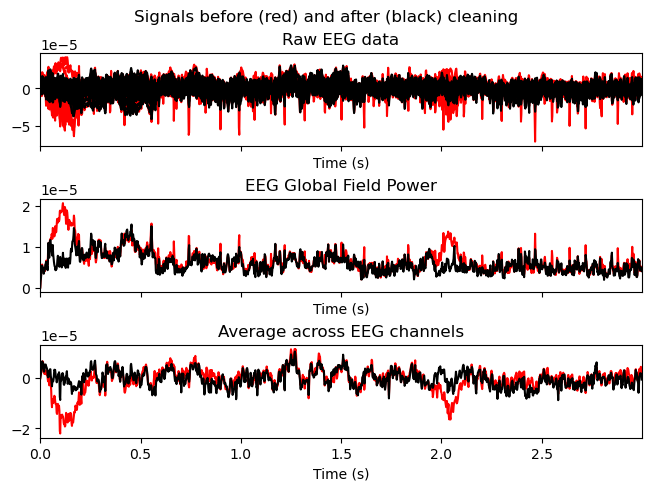

In [97]:
ica.apply(raw) 
ica.plot_overlay(raw, exclude=artifacts_idx)

Finally, let's try an automated algorithm to find muscle components
and ensure that it gets the same components we did manually.



Effective window size : 4.000 (s)


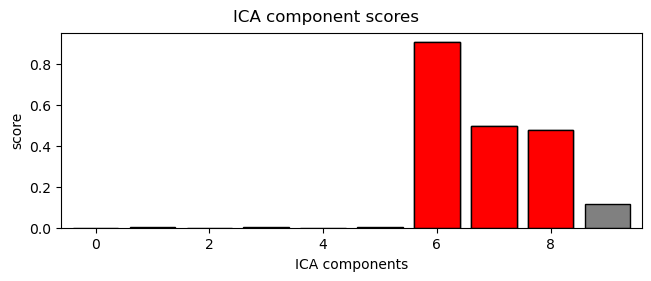

Manually found muscle artifact ICA components:      [3, 5, 6, 7, 8]
Automatically found muscle artifact ICA components: [6, 7, 8]


In [98]:
muscle_idx_auto, scores = ica.find_bads_muscle(raw)
ica.plot_scores(scores, exclude=muscle_idx_auto)
print(
    f"Manually found muscle artifact ICA components:      {artifacts_idx}\n"
    f"Automatically found muscle artifact ICA components: {muscle_idx_auto}"
)

## References

Dhani Dharmaprani, Hoang K. Nguyen, Trent W. Lewis, Dylan DeLosAngeles, John O. Willoughby, and Kenneth J. Pope. A comparison of independent component analysis algorithms and measures to discriminate between EEG and artifact components. In 2016 38th Annual International Conference of the IEEE Engineering in Medicine and Biology Society (EMBC), 825–828. Orlando, FL, USA, 2016. IEEE. doi:10.1109/EMBC.2016.7590828.

